In [2]:
import pandas as pd
import os

In [4]:
os.chdir(r'C:\Users\shres\OneDrive\Desktop\windspeed')

In [5]:
from spacepy import pycdf

In [6]:
cdf = pycdf.CDF('wi_h1_swe_20120101_v01.cdf')

In [7]:
cdf

<CDF:
Alpha_Na_nonlin: CDF_FLOAT [872]
Alpha_VX_nonlin: CDF_FLOAT [872]
Alpha_VY_nonlin: CDF_FLOAT [872]
Alpha_VZ_nonlin: CDF_FLOAT [872]
Alpha_V_nonlin: CDF_FLOAT [872]
Alpha_W_nonlin: CDF_FLOAT [872]
Alpha_Wpar_nonlin: CDF_FLOAT [872]
Alpha_Wperp_nonlin: CDF_FLOAT [872]
Alpha_sigmaNa_nonlin: CDF_FLOAT [872]
Alpha_sigmaVX_nonlin: CDF_FLOAT [872]
Alpha_sigmaVY_nonlin: CDF_FLOAT [872]
Alpha_sigmaVZ_nonlin: CDF_FLOAT [872]
Alpha_sigmaV_nonlin: CDF_FLOAT [872]
Alpha_sigmaW_nonlin: CDF_FLOAT [872]
Alpha_sigmaWpar_nonlin: CDF_FLOAT [872]
Alpha_sigmaWperp_nonlin: CDF_FLOAT [872]
Ang_dev: CDF_FLOAT [872]
BX: CDF_FLOAT [872]
BY: CDF_FLOAT [872]
BZ: CDF_FLOAT [872]
ChisQ_DOF_nonlin: CDF_FLOAT [872]
EW_flowangle: CDF_FLOAT [872]
Epoch: CDF_EPOCH [872]
NS_flowangle: CDF_FLOAT [872]
Peak_doy: CDF_DOUBLE [872]
Proton_Np_moment: CDF_FLOAT [872]
Proton_Np_nonlin: CDF_FLOAT [872]
Proton_VX_moment: CDF_FLOAT [872]
Proton_VX_nonlin: CDF_FLOAT [872]
Proton_VY_moment: CDF_FLOAT [872]
Proton_VY_nonlin: CDF

In [9]:
cdf['Proton_V_moment'][:]

array([388.28253, 389.46982, 389.5889 , 393.6907 , 392.13675, 390.0496 ,
       387.07645, 375.95685, 379.03433, 384.44168, 393.13022, 393.55988,
       394.59656, 392.1765 , 390.55017, 390.63837, 391.77927, 391.9998 ,
       394.61304, 395.00357, 393.90698, 391.91074, 391.03568, 389.04996,
       387.9322 , 387.5705 , 394.29205, 389.5143 , 391.04758, 377.3405 ,
       385.45767, 380.81265, 384.9855 , 388.22888, 389.73352, 383.32367,
       382.5543 , 385.59866, 387.63654, 387.72968, 387.40817, 384.83768,
       384.92346, 383.23267, 383.333  , 378.4309 , 374.8576 , 376.53775,
       380.49792, 380.75378, 384.25693, 392.562  , 388.2205 , 383.75217,
       384.27615, 388.76627, 388.08597, 387.88513, 389.1202 , 379.71667,
       378.09613, 377.96756, 378.49786, 376.956  , 378.1526 , 380.6447 ,
       376.96664, 378.98038, 380.7836 , 380.30978, 382.9602 , 380.2001 ,
       381.83817, 383.1576 , 378.32263, 380.7784 , 379.81567, 380.94827,
       383.91254, 378.54324, 378.0338 , 378.6286 , 

In [10]:
cdf['Proton_V_nonlin'][:]

array([386.31277, 387.78693, 387.28085, 391.91663, 389.68793, 387.56815,
       385.17102, 373.40378, 377.0514 , 383.3808 , 391.4638 , 391.67676,
       392.1751 , 390.3753 , 388.03326, 387.79422, 389.25592, 389.7814 ,
       392.1127 , 392.707  , 391.89508, 389.7268 , 388.34338, 386.52704,
       385.67145, 385.72195, 392.16864, 388.5633 , 388.28354, 375.43436,
       383.26694, 379.73947, 383.1957 , 386.179  , 387.5883 , 380.9752 ,
       380.77646, 384.70404, 385.7143 , 386.39304, 385.9592 , 383.8181 ,
       384.09656, 381.6155 , 381.34662, 376.83505, 373.77258, 375.73343,
       377.5257 , 379.48837, 383.5665 , 390.5678 , 386.98196, 382.994  ,
       383.45532, 387.24716, 385.5202 , 386.1629 , 386.5662 , 378.0798 ,
       376.82156, 376.3605 , 377.07086, 375.01038, 376.5405 , 379.28867,
       375.08875, 378.1317 , 378.26266, 378.29495, 380.94733, 378.41788,
       380.2404 , 381.28162, 376.85788, 379.91348, 379.3524 , 381.46124,
       383.9537 , 377.57263, 376.64413, 377.10992, 

In [16]:
sum(cdf['Proton_V_moment'][:] - cdf['Proton_V_nonlin'] > 20)

0

In [19]:
velocity = (cdf['Proton_V_moment'][:] + cdf['Proton_V_nonlin'])/2

In [21]:
splits = [i*int(len(velocity)/24) for i in range(25)]

In [22]:
#split a day's data into 24 data points
data = []
for i in range(len(splits)-1):
    avg = sum(velocity[splits[i]:splits[i+1]])/(splits[i+1]-splits[i])
    data.append(avg)

In [23]:
len(data)

24

In [24]:
windspeed_data = []

In [25]:
from tqdm import tqdm

In [27]:
for file in tqdm(os.listdir(r'C:\Users\shres\OneDrive\Desktop\windspeed')):
    cdf = pycdf.CDF(file)
    velocity = (cdf['Proton_V_moment'][:] + cdf['Proton_V_nonlin'])/2
    splits = [i*int(len(velocity)/24) for i in range(25)]
    for i in range(len(splits)-1):
        avg = sum(velocity[splits[i]:splits[i+1]])/(splits[i+1]-splits[i])
        windspeed_data.append(avg)

100%|████████████████████████████████████████████████████████████████████████████████| 364/364 [01:51<00:00,  3.28it/s]


In [28]:
len(windspeed_data)

8736

In [29]:
24*364

8736

In [30]:
import matplotlib.pyplot as plt

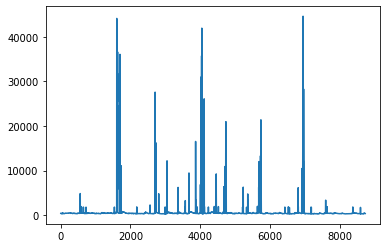

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(windspeed_data)

In [32]:
import scipy

In [33]:
scipy.stats.mode(windspeed_data)

C:\Users\shres\AppData\Local\Temp\ipykernel_10752\430340977.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(windspeed_data)


ModeResult(mode=array([267.34737592]), count=array([1]))

In [34]:
import numpy as np

In [35]:
windspeed_data = np.array(windspeed_data, dtype='float32')

In [36]:
data = pd.DataFrame(windspeed_data, columns=['ProtonSpeed (km/s)'])

In [37]:
data.to_csv(r'C:\Users\shres\protonspeed.csv', index=False)

In [38]:
data.describe()

,ProtonSpeed (km/s)
count,8736.000000
mean,685.234985
std,2313.286377
min,267.347382
25%,345.360657
50%,396.166748
75%,453.953766
max,44598.128906


In [40]:
sum(windspeed_data > 1000)

260